In [1]:
# LIBARIES NEEDED

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV files into a DataFrame
full_reviews_neg = pd.read_csv('full_reviews_neg.csv')
full_reviews_pos = pd.read_csv('full_reviews_pos.csv')
reviews = pd.read_csv('reviews.csv')
leads = pd.read_csv('leads.csv')
merchants = pd.read_csv('merchants.csv')
merchants_W = pd.read_csv('merchants_W.csv')
order = pd.read_csv('order.csv')

In [3]:
# Looking for the total price per seller
total_price = order.groupby('seller_id')['price'].sum()

# Sorting by total price per seller
top_sellers = total_price.sort_values(ascending=False)
top_sellers = top_sellers.reset_index(name='total_price')
top_sellers

,seller_id,total_price
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1,53243585a1d6dc2643021fd1853d8905,222776.05
2,4a3ca9315b744ce9f8e9374361493884,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...,...
3089,34aefe746cd81b7f3b23253ea28bef39,8.00
3090,702835e4b785b67a084280efca355756,7.60
3091,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
3092,77128dec4bec4878c37ab7d6169d6f26,6.50


In [4]:
#Adding the total_price to the original dataframe
order['total_price'] = order['seller_id'].map(total_price)
order.head()

,order_id,order_line_item,product_id,seller_id,order_date_time,price,freight_cost,total_price
0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2020-05-03 11:05:13,239.90,19.93,9178.51
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2021-01-18 14:48:30,199.00,17.87,3280.00
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2021-08-15 10:10:18,12.99,12.79,1054.82
3,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2020-02-14 13:57:51,199.90,18.14,3661.18
4,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2020-05-23 03:55:27,21.90,12.69,1209.64


In [5]:
# Merge orders and reviews
orders_review_score = pd.merge(reviews, 
                          order[['order_id','seller_id',
                                 'price', 'freight_cost',
                                 'total_price']], on='order_id')

# Remove double quotes from the 'review_id' column
orders_review_score['review_id'] = orders_review_score['review_id'].str.replace('"', '').str.strip()

# Removing duplicates
orders_review_score = orders_review_score.drop_duplicates()
orders_review_score

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,seller_id,price,freight_cost,total_price
0,﻿7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2021-01-18 00:00:00,2021-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,185.00,13.63,8711.40
2,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2021-01-18 00:00:00,2021-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,185.00,13.63,8711.40
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2021-03-10 00:00:00,2021-03-11 03:05:13,8e6d7754bc7e0f22c96d255ebda59eba,79.79,8.30,14497.27
5,1fac9acb29e014e3b9b393d5c8505f99,0188777fe321843a18be24a6e9aa1e53,5,2020-07-29 00:00:00,2020-08-01 20:55:50,48436dade18ac8b2bce089ec2a041202,55.90,9.94,12271.71
6,2eab04a8f45efa131d44cf58b37ab595,0191bbb5166d4b9a68df11797d5acfa9,5,2020-08-25 00:00:00,2020-08-28 12:57:25,48436dade18ac8b2bce089ec2a041202,132.90,20.17,12271.71
...,...,...,...,...,...,...,...,...,...
156383,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,2021-05-11 00:00:00,2021-05-14 12:53:47,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,13685.71
156384,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,2021-07-24 00:00:00,2021-07-25 09:25:29,f3c38ab652836d21de61fb8314b69182,350.00,36.53,1581.00
156385,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,2020-10-29 00:00:00,2020-10-29 21:33:52,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,43048.18
156386,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,2020-08-17 00:00:00,2020-08-18 12:24:05,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,23629.15


In [6]:
# Group orders_reviews by seller_id and calculate the mean review_score for each group
avg_review_score_by_seller = orders_review_score.groupby('seller_id')['review_score'].mean()

In [7]:
#Adding the avg_review_score_by_seller to the original dataframe
orders_review_score['avg_review_score_by_seller'] = orders_review_score['seller_id'].map(avg_review_score_by_seller)
orders_review_score


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,seller_id,price,freight_cost,total_price,avg_review_score_by_seller
0,﻿7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2021-01-18 00:00:00,2021-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,185.00,13.63,8711.40,4.245902
2,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2021-01-18 00:00:00,2021-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,185.00,13.63,8711.40,4.245902
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2021-03-10 00:00:00,2021-03-11 03:05:13,8e6d7754bc7e0f22c96d255ebda59eba,79.79,8.30,14497.27,3.663158
5,1fac9acb29e014e3b9b393d5c8505f99,0188777fe321843a18be24a6e9aa1e53,5,2020-07-29 00:00:00,2020-08-01 20:55:50,48436dade18ac8b2bce089ec2a041202,55.90,9.94,12271.71,4.034722
6,2eab04a8f45efa131d44cf58b37ab595,0191bbb5166d4b9a68df11797d5acfa9,5,2020-08-25 00:00:00,2020-08-28 12:57:25,48436dade18ac8b2bce089ec2a041202,132.90,20.17,12271.71,4.034722
...,...,...,...,...,...,...,...,...,...,...
156383,9185f849f32d82e216a4e025e0c50f5c,fffc94f6ce00a00581880bf54a75a037,5,2021-05-11 00:00:00,2021-05-14 12:53:47,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,13685.71,4.318182
156384,be803f6a93d64719fd685c1cc610918a,fffcd46ef2263f404302a634eb57f7eb,5,2021-07-24 00:00:00,2021-07-25 09:25:29,f3c38ab652836d21de61fb8314b69182,350.00,36.53,1581.00,4.266667
156385,dbdd81cd59a1a9f94a10a990b4d48dce,fffce4705a9662cd70adb13d4a31832d,5,2020-10-29 00:00:00,2020-10-29 21:33:52,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,43048.18,4.468310
156386,fba117c9ac40d41ca7be54741f471303,fffe18544ffabc95dfada21779c9644f,5,2020-08-17 00:00:00,2020-08-18 12:24:05,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,23629.15,4.365385


In [8]:
# Merge orders and reviews
orders_neg_reviews = pd.merge(full_reviews_neg[['review_id', 'order_id',
                                           'review_score', 'VADER_compound_score']], 
                          orders_review_score[['order_id','seller_id',
                                 'price', 'freight_cost',
                                 'total_price', 'avg_review_score_by_seller']], on='order_id')
orders_pos_reviews = pd.merge(full_reviews_pos[['review_id', 'order_id',
                                           'review_score', 'VADER_compound_score']], 
                          orders_review_score[['order_id','seller_id',
                                 'price', 'freight_cost',
                                 'total_price', 'avg_review_score_by_seller']], on='order_id')


# Append the two data frames
orders_reviews = pd.concat([orders_pos_reviews, orders_neg_reviews], ignore_index=True)

# Removing duplicates
orders_reviews = orders_reviews.drop_duplicates()
orders_reviews

,review_id,order_id,review_score,VADER_compound_score,seller_id,price,freight_cost,total_price,avg_review_score_by_seller
0,5595c192e3c1566ab4e7a2748b8ed297,00063b381e2406b52ad429470734ebd5,5,0.3291,8602a61d680a10a82cceeeda0d99ea3d,45.00,12.98,826.99,4.411765
1,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,0.8316,4a3ca9315b744ce9f8e9374361493884,87.00,12.11,200472.92,3.830811
5,2a74b0559eb58fc1ff842ecc999594cb,b50a7d7b24d9089159085f878aecfad0,5,0.8316,3b15288545f8928d3e65a8f949a28291,77.99,12.89,14061.79,3.971963
7,50a1eaa2f96d6f3e02d0cd68d92bab75,4a7cf245701068d38d441791b735e4bd,5,0.5994,7c5b05cbdb5542049f38d90d7815b97d,18.99,7.39,1038.96,4.391304
8,fa2d523cc60173d4889520763a2e4851,001021efaa8636c29475e7734483457d,4,0.5994,6560211a19b47992c3666cc44a7e94c0,49.00,15.10,123304.83,3.916882
...,...,...,...,...,...,...,...,...,...
4925,72fc0c9262763d7a6b47cee12ecdbf96,ff61c865c1495e71465c79009005611c,3,-0.2960,7178f9f4dd81dcef02f62acdf8151e01,129.90,15.66,37070.40,4.044335
4926,005ee02b2a92d329cd650b1bba202b26,ff73e2e57b5c7d3a1aa7c3ccaacafaa6,2,-0.4404,7c67e1448b00f6e969d365cea6b010ab,146.99,33.26,187923.89,3.472745
4927,09fc7c8705a3face8b43c173a89bc54d,ffa1dd31c0e1fd3a1248fe23238eccd5,1,-0.2960,4736e9d642ef4257cd7622516931eb51,59.99,14.00,1078.87,4.176471
4928,97752ca492cf243c6aca3289550533d4,ffc97f5975c4aa1b3c9754d83050c73d,3,-0.2500,c33847515fa6305ce6feb1e818569f13,149.00,41.33,15519.85,3.813559


In [9]:
orders_reviews = orders_reviews[['review_id', 'order_id', 'seller_id',
                                 'review_score', 'VADER_compound_score',
                                 'price', 'freight_cost', 'total_price',
                                 'avg_review_score_by_seller']]
orders_reviews

,review_id,order_id,seller_id,review_score,VADER_compound_score,price,freight_cost,total_price,avg_review_score_by_seller
0,5595c192e3c1566ab4e7a2748b8ed297,00063b381e2406b52ad429470734ebd5,8602a61d680a10a82cceeeda0d99ea3d,5,0.3291,45.00,12.98,826.99,4.411765
1,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,4a3ca9315b744ce9f8e9374361493884,5,0.8316,87.00,12.11,200472.92,3.830811
5,2a74b0559eb58fc1ff842ecc999594cb,b50a7d7b24d9089159085f878aecfad0,3b15288545f8928d3e65a8f949a28291,5,0.8316,77.99,12.89,14061.79,3.971963
7,50a1eaa2f96d6f3e02d0cd68d92bab75,4a7cf245701068d38d441791b735e4bd,7c5b05cbdb5542049f38d90d7815b97d,5,0.5994,18.99,7.39,1038.96,4.391304
8,fa2d523cc60173d4889520763a2e4851,001021efaa8636c29475e7734483457d,6560211a19b47992c3666cc44a7e94c0,4,0.5994,49.00,15.10,123304.83,3.916882
...,...,...,...,...,...,...,...,...,...
4925,72fc0c9262763d7a6b47cee12ecdbf96,ff61c865c1495e71465c79009005611c,7178f9f4dd81dcef02f62acdf8151e01,3,-0.2960,129.90,15.66,37070.40,4.044335
4926,005ee02b2a92d329cd650b1bba202b26,ff73e2e57b5c7d3a1aa7c3ccaacafaa6,7c67e1448b00f6e969d365cea6b010ab,2,-0.4404,146.99,33.26,187923.89,3.472745
4927,09fc7c8705a3face8b43c173a89bc54d,ffa1dd31c0e1fd3a1248fe23238eccd5,4736e9d642ef4257cd7622516931eb51,1,-0.2960,59.99,14.00,1078.87,4.176471
4928,97752ca492cf243c6aca3289550533d4,ffc97f5975c4aa1b3c9754d83050c73d,c33847515fa6305ce6feb1e818569f13,3,-0.2500,149.00,41.33,15519.85,3.813559


In [10]:
#Joining the sellers info with the merchants table to see which seller-merchant ID combinations appear in both tables
sellers = pd.merge(top_sellers, merchants, left_on='seller_id', right_on='merchant_id', how='left')

# Drop NaN values, in order to get rid of the "extra" values in the sellers ID, 
# values that existed before our analysis 
# (sellers that appear on the order table but that are not merchants)
sellers = sellers.dropna()

# Reset index
sellers = sellers.reset_index(drop=True)
sellers

,seller_id,total_price,merchant_id,lead_id,business_segment,lead_behavior,business_type,declared_monthly_revenue
0,7d13fca15225358621be4086e1eb0964,113628.97,7d13fca15225358621be4086e1eb0964,0b97be8b4b408a3a0780a32e0a143a7f,watches,Influence / Yellow,reseller,0.0
1,ba90964cff9b9e0e6f32b23b82465f7b,44212.50,ba90964cff9b9e0e6f32b23b82465f7b,8257329475414b1eaf3dc731440e01a7,small_appliances,Stability / Green,reseller,0.0
2,c70c1b0d8ca86052f45a432a38b73958,36537.37,c70c1b0d8ca86052f45a432a38b73958,7b6ad2297d3beb569ddf3ee1ce22ffa8,health_beauty,Dominant / Red,reseller,0.0
3,612170e34b97004b3ba37eae81836b4c,23065.02,612170e34b97004b3ba37eae81836b4c,327174d3648a2d047e8940d7d15204ca,home_appliances,Stability / Green,reseller,0.0
4,6061155addc1e54b4cfb51c1c2a32ad8,15633.40,6061155addc1e54b4cfb51c1c2a32ad8,8d6be534a8bdd08e11efe57c6ce3dd21,pet,Stability / Green,reseller,0.0
...,...,...,...,...,...,...,...,...
374,5e063e85d44b0f5c3e6ec3131103a57e,22.90,5e063e85d44b0f5c3e6ec3131103a57e,b91cf8812365f50ff4bda4bcd6206b05,health_beauty,Stability / Green,reseller,0.0
375,bc8c8d665ec4664d286be0d521722b19,22.50,bc8c8d665ec4664d286be0d521722b19,5f7526ec1bdd6eebdf4f7d0054cfe163,food_drink,Conformity / Blue,reseller,0.0
376,455befea1bb853c75ccbca94cff26e5c,19.99,455befea1bb853c75ccbca94cff26e5c,28f36aa85fbadc0663c2df15a5af35db,phone_mobile,Stability / Green,reseller,0.0
377,bb7ad8a45c027be8ab075b8e465f8ca0,19.98,bb7ad8a45c027be8ab075b8e465f8ca0,47a752e75a196b3b4edd825252ccf97f,household_utilities,Stability / Green,manufacturer,0.0


In [11]:
# Adding review average to sellers df
sellers['avg_review_score_by_seller'] = sellers['seller_id'].map(avg_review_score_by_seller)
sellers


,seller_id,total_price,merchant_id,lead_id,business_segment,lead_behavior,business_type,declared_monthly_revenue,avg_review_score_by_seller
0,7d13fca15225358621be4086e1eb0964,113628.97,7d13fca15225358621be4086e1eb0964,0b97be8b4b408a3a0780a32e0a143a7f,watches,Influence / Yellow,reseller,0.0,4.021352
1,ba90964cff9b9e0e6f32b23b82465f7b,44212.50,ba90964cff9b9e0e6f32b23b82465f7b,8257329475414b1eaf3dc731440e01a7,small_appliances,Stability / Green,reseller,0.0,4.421053
2,c70c1b0d8ca86052f45a432a38b73958,36537.37,c70c1b0d8ca86052f45a432a38b73958,7b6ad2297d3beb569ddf3ee1ce22ffa8,health_beauty,Dominant / Red,reseller,0.0,4.354962
3,612170e34b97004b3ba37eae81836b4c,23065.02,612170e34b97004b3ba37eae81836b4c,327174d3648a2d047e8940d7d15204ca,home_appliances,Stability / Green,reseller,0.0,4.429907
4,6061155addc1e54b4cfb51c1c2a32ad8,15633.40,6061155addc1e54b4cfb51c1c2a32ad8,8d6be534a8bdd08e11efe57c6ce3dd21,pet,Stability / Green,reseller,0.0,4.677419
...,...,...,...,...,...,...,...,...,...
374,5e063e85d44b0f5c3e6ec3131103a57e,22.90,5e063e85d44b0f5c3e6ec3131103a57e,b91cf8812365f50ff4bda4bcd6206b05,health_beauty,Stability / Green,reseller,0.0,5.000000
375,bc8c8d665ec4664d286be0d521722b19,22.50,bc8c8d665ec4664d286be0d521722b19,5f7526ec1bdd6eebdf4f7d0054cfe163,food_drink,Conformity / Blue,reseller,0.0,2.000000
376,455befea1bb853c75ccbca94cff26e5c,19.99,455befea1bb853c75ccbca94cff26e5c,28f36aa85fbadc0663c2df15a5af35db,phone_mobile,Stability / Green,reseller,0.0,3.000000
377,bb7ad8a45c027be8ab075b8e465f8ca0,19.98,bb7ad8a45c027be8ab075b8e465f8ca0,47a752e75a196b3b4edd825252ccf97f,household_utilities,Stability / Green,manufacturer,0.0,5.000000


In [14]:
# Merging seller and merchant information to reviews df
sellers_reviews = pd.merge(orders_reviews, sellers, on = 'seller_id')

sellers_reviews = sellers_reviews[['review_id', 'order_id', 'seller_id', 
                                   'merchant_id', 'lead_id','review_score',
                                   'VADER_compound_score', 'price', 
                                   'freight_cost', 'total_price_x',
                                   'avg_review_score_by_seller_x', 
                                   'business_segment', 'lead_behavior', 
                                   'business_type']]
# Rename total_price_x
sellers_reviews = sellers_reviews.rename(columns={'total_price_x': 'total_price'})
sellers_reviews = sellers_reviews.rename(columns={'avg_review_score_by_seller_x': 'avg_review_score_by_seller'})

sellers_reviews

,review_id,order_id,seller_id,merchant_id,lead_id,review_score,VADER_compound_score,price,freight_cost,total_price,avg_review_score_by_seller,business_segment,lead_behavior,business_type
0,8f9aa50ee40780ba3f79614530a34ebe,729c445f5f350f88d5c9a3911d6e9bc0,6aa3928696eab49a19a466e665a649fd,6aa3928696eab49a19a466e665a649fd,c028b7dd285d13e19ff7a4cabf8bf700,5,0.5994,89.00,9.16,2075.00,4.473684,health_beauty,Stability / Green,reseller
1,22591e74778cc4a43743c6b73075ce96,2380ca3ffd1097862f0f1f9b8f7c566f,6aa3928696eab49a19a466e665a649fd,6aa3928696eab49a19a466e665a649fd,c028b7dd285d13e19ff7a4cabf8bf700,5,0.5994,69.00,22.19,2075.00,4.473684,health_beauty,Stability / Green,reseller
2,c1d8be7d76b297093f4eba70cdebeeb9,8ace197d57084cf99d770809ef26dab7,7d13fca15225358621be4086e1eb0964,7d13fca15225358621be4086e1eb0964,0b97be8b4b408a3a0780a32e0a143a7f,5,0.5994,499.99,15.94,113628.97,4.021352,watches,Influence / Yellow,reseller
3,ff2cf8c91feac0bc37e795daec9c77af,628365400ec276cda9dbce783340e906,7d13fca15225358621be4086e1eb0964,7d13fca15225358621be4086e1eb0964,0b97be8b4b408a3a0780a32e0a143a7f,5,0.0258,545.00,25.52,113628.97,4.021352,watches,Influence / Yellow,reseller
4,71a53f552b4a4d976a3a5143892ecb0e,982a2255031a99176b6786069e8fa1ae,7d13fca15225358621be4086e1eb0964,7d13fca15225358621be4086e1eb0964,0b97be8b4b408a3a0780a32e0a143a7f,4,0.2960,240.00,13.18,113628.97,4.021352,watches,Influence / Yellow,reseller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0dcffe71f4f2cf8dbf17b622bfaf4943,cad4f1f1630718b17426b3f335d0404e,165b1235e9e9942cb5fae67103576fb0,165b1235e9e9942cb5fae67103576fb0,3469f647707d7517364600b07bd45816,3,-0.2960,178.50,34.33,2085.15,4.363636,home_decor,Stability / Green,reseller
186,b91fe902fc1cff5ead26ff0ff79c1490,e85ade63f3d697aa6c45970baeff0d96,c0aff2da32c17759d30b22fb0af6649d,c0aff2da32c17759d30b22fb0af6649d,f6127362ba4727c54d742b7ab1ae7c1c,3,-0.5267,17.00,15.23,188.80,3.750000,music_instruments,Conformity / Blue,reseller
187,0de6a1e4db45949471e4bb262d2fd317,f98dc0bb1b5d1102af20837256cca2c5,e9e446d01bd10a97a8ffcfc4a3a20cb2,e9e446d01bd10a97a8ffcfc4a3a20cb2,29b97ecc5839e61efb7bdc25e979d8c6,1,-0.2960,8.90,7.39,60.05,3.500000,health_beauty,Stability / Green,reseller
188,cbe7e6af895bfed54eff174d62feadb1,fa09bf06f137e4496f69f730fd93dcaf,72c38a04bd6a1c3dbc5298425a0db86d,72c38a04bd6a1c3dbc5298425a0db86d,5ebfa70416c6e41452ddde4ce2b536ac,1,-0.6808,92.00,22.57,647.30,3.750000,audio_video_electronics,Stability / Green,reseller


In [15]:
sellers_reviews_clean = sellers_reviews[['order_id', 'seller_id', 
                                         'VADER_compound_score', 
                                         'price', 'freight_cost', 'total_price',
                                         'avg_review_score_by_seller', 
                                         'business_segment', 'lead_behavior', 
                                         'business_type']]
sellers_reviews_clean

,order_id,seller_id,VADER_compound_score,price,freight_cost,total_price,avg_review_score_by_seller,business_segment,lead_behavior,business_type
0,729c445f5f350f88d5c9a3911d6e9bc0,6aa3928696eab49a19a466e665a649fd,0.5994,89.00,9.16,2075.00,4.473684,health_beauty,Stability / Green,reseller
1,2380ca3ffd1097862f0f1f9b8f7c566f,6aa3928696eab49a19a466e665a649fd,0.5994,69.00,22.19,2075.00,4.473684,health_beauty,Stability / Green,reseller
2,8ace197d57084cf99d770809ef26dab7,7d13fca15225358621be4086e1eb0964,0.5994,499.99,15.94,113628.97,4.021352,watches,Influence / Yellow,reseller
3,628365400ec276cda9dbce783340e906,7d13fca15225358621be4086e1eb0964,0.0258,545.00,25.52,113628.97,4.021352,watches,Influence / Yellow,reseller
4,982a2255031a99176b6786069e8fa1ae,7d13fca15225358621be4086e1eb0964,0.2960,240.00,13.18,113628.97,4.021352,watches,Influence / Yellow,reseller
...,...,...,...,...,...,...,...,...,...,...
185,cad4f1f1630718b17426b3f335d0404e,165b1235e9e9942cb5fae67103576fb0,-0.2960,178.50,34.33,2085.15,4.363636,home_decor,Stability / Green,reseller
186,e85ade63f3d697aa6c45970baeff0d96,c0aff2da32c17759d30b22fb0af6649d,-0.5267,17.00,15.23,188.80,3.750000,music_instruments,Conformity / Blue,reseller
187,f98dc0bb1b5d1102af20837256cca2c5,e9e446d01bd10a97a8ffcfc4a3a20cb2,-0.2960,8.90,7.39,60.05,3.500000,health_beauty,Stability / Green,reseller
188,fa09bf06f137e4496f69f730fd93dcaf,72c38a04bd6a1c3dbc5298425a0db86d,-0.6808,92.00,22.57,647.30,3.750000,audio_video_electronics,Stability / Green,reseller


In [16]:
# Group by business segment, business type, and lead behavior and calculate mean review score
grouped = sellers_reviews_clean.groupby(['business_segment', 'business_type', 'lead_behavior']).mean()['avg_review_score_by_seller']

grouped 

# Create bar plot for mean review score
#grouped.plot(kind='bar')
#plt.title('Average Review Score by Business Segment, Business Type, and Lead Behavior')
#plt.xlabel('Business Segment, Business Type, and Lead Behavior')
#plt.ylabel('Average Review Score')
#plt.show()

business_segment                 business_type  lead_behavior     
audio_video_electronics          manufacturer   Stability / Green     3.255319
                                 reseller       Conformity / Blue     5.000000
                                                Stability / Green     4.160099
baby                             reseller       Influence / Yellow    4.000000
bags_backpacks                   reseller       Stability / Green     4.068966
bed_bath_table                   manufacturer   Stability / Green     4.333333
                                 reseller       Stability / Green     4.105559
books                            reseller       Stability / Green     4.416667
car_accessories                  manufacturer   Conformity / Blue     3.500000
                                                Influence / Yellow    3.777778
                                                Stability / Green     4.352941
                                 reseller       Influence / Yell

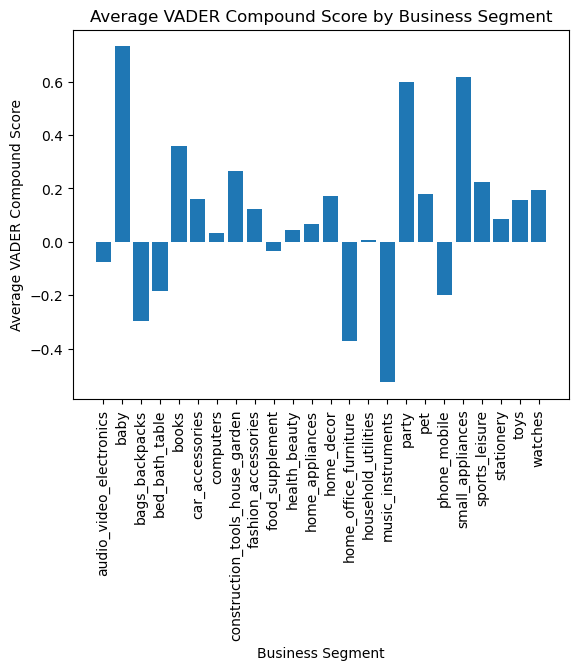

In [17]:
# group by business_segment and calculate mean of VADER_compound_score
segment_mean = sellers_reviews_clean.groupby('business_segment')[['VADER_compound_score', 'avg_review_score_by_seller']].mean()

# create bar plot of mean VADER_compound_score by business_segment
plt.bar(segment_mean.index, segment_mean['VADER_compound_score'])
plt.xlabel('Business Segment')
plt.ylabel('Average VADER Compound Score')
plt.title('Average VADER Compound Score by Business Segment')
plt.xticks(rotation=90)
plt.show()


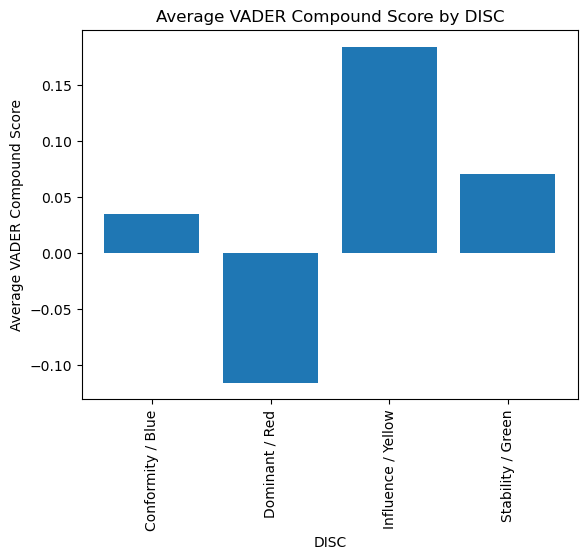

In [18]:
# group by lead_behavior and calculate mean of VADER_compound_score
DISC_mean = sellers_reviews_clean.groupby('lead_behavior')[['VADER_compound_score', 'avg_review_score_by_seller']].mean()

# create bar plot of mean VADER_compound_score by business_segment
plt.bar(DISC_mean.index, DISC_mean['VADER_compound_score'])
plt.xlabel('DISC')
plt.ylabel('Average VADER Compound Score')
plt.title('Average VADER Compound Score by DISC')
plt.xticks(rotation=90)
plt.show()

In [19]:
sellers_reviews_clean.to_csv('sellers_reviews_clean.csv')